In [3]:
from seisLM.data_pipeline import dataloaders
from ml_collections import config_dict
from transformers import Wav2Vec2Config
import json
from seisLM.model.foundation.pretrained_models import LitMultiDimWav2Vec2
from seisLM.data_pipeline import collator
import logging
import numpy as np

# [
#     "ETHZ",
#     "GEOFON",
#     "STEAD",
#     "NEIC"
# ]


dataset_names = [
  "ETHZ",
  "GEOFON",
  "STEAD",
  "NEIC",
  "InstanceCountsCombined",
  "Iquique",
  "LenDB",
  "SCEDC",
]


2024-07-01 06:41:18,454 | seisbench | WARNING | Check available storage and memory before downloading and general use of SCEDC dataset. Dataset size: waveforms.hdf5 ~660Gb, metadata.csv ~2.2Gb
2024-07-01 06:42:00,092 | seisbench | WARNING | No data_format group found in .hdf5 File.
2024-07-01 06:42:00,094 | seisbench | WARNING | Dimension order not specified in data set. Assuming CW.
2024-07-01 06:42:10,355 | seisbench | WARNING | Component order not specified, defaulting to 'ZNE'.
2024-07-01 06:42:10,356 | seisbench | WARNING | Default component order 'ZNE' does not match dataset component order 'None'.


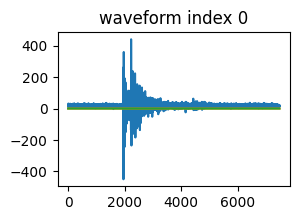

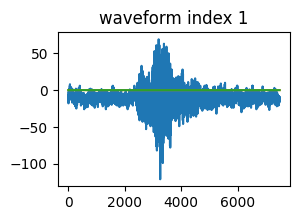

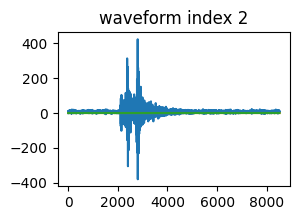

In [3]:
import seisbench.data as sbd
import matplotlib.pyplot as plt

dataset = sbd.SCEDC(
      sampling_rate=100,
      # component_order='ZNE',
      # dimension_order='NCW',
      cache=None
)


for i in range(3):
  # print(dataset_name)
  plt.figure(figsize=(3, 2))
  plt.plot(dataset.get_waveforms(i).T )
  plt.title(f'waveform index {i}')


In [2]:
dataset.get_waveforms(i).T

array([[7, 0, 0],
       [5, 0, 0],
       [8, 0, 0],
       ...,
       [9, 0, 0],
       [8, 0, 0],
       [9, 0, 0]], dtype=int32)

In [23]:
dataset_collections = {}
for dataset_name in dataset_names:
  dataset = dataloaders.get_dataset_by_name(dataset_name)(
      sampling_rate=100,
      component_order='ZNE',
      dimension_order='NCW',
      cache=None
  )

  print(f'{dataset_name} has split?', "split" in dataset.metadata.columns)
  if "split" not in dataset.metadata.columns:
    logging.warning("No split defined, adding auxiliary split.")
    split = np.array(["train"] * len(dataset))
    split[int(0.6 * len(dataset)) : int(0.7 * len(dataset))] = "dev"
    split[int(0.7 * len(dataset)) :] = "test"
    dataset._metadata["split"] = split  # pylint: disable=protected-access

  print(f'{dataset_name} has split?', "split" in dataset.metadata.columns)
  dataset_collections[dataset_name] = dataset

  # train = data.train()
  # dev = data.dev()



2024-07-01 00:01:28,870 | seisbench | WARNING | Check available storage and memory before downloading and general use of ETHZ dataset. Dataset size: waveforms.hdf5 ~22Gb, metadata.csv ~13Mb


ETHZ has split? True
ETHZ has split? True
GEOFON has split? True
GEOFON has split? True
STEAD has split? True
STEAD has split? True
NEIC has split? True
NEIC has split? True


2024-07-01 00:02:34,461 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


InstanceCountsCombined has split? True
InstanceCountsCombined has split? True
Iquique has split? True
Iquique has split? True


2024-07-01 00:02:43,371 | seisbench | WARNING | Check available storage and memory before downloading and general use of SCEDC dataset. Dataset size: waveforms.hdf5 ~660Gb, metadata.csv ~2.2Gb


LenDB has split? True
LenDB has split? True


2024-07-01 00:03:41,060 | seisbench | WARNING | No data_format group found in .hdf5 File.
2024-07-01 00:03:41,061 | seisbench | WARNING | Dimension order not specified in data set. Assuming CW.


SCEDC has split? False
SCEDC has split? True


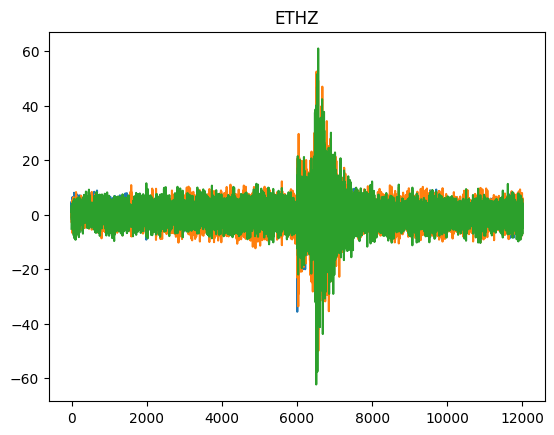

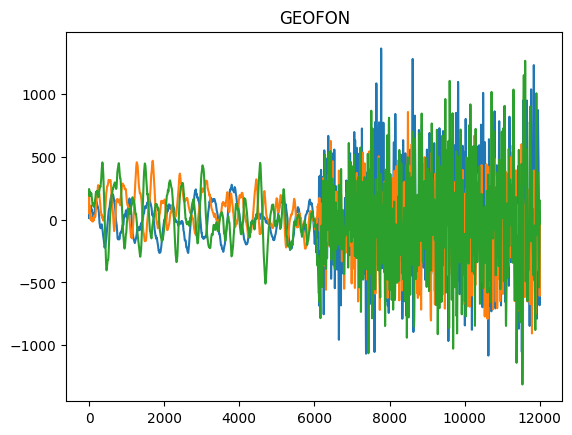

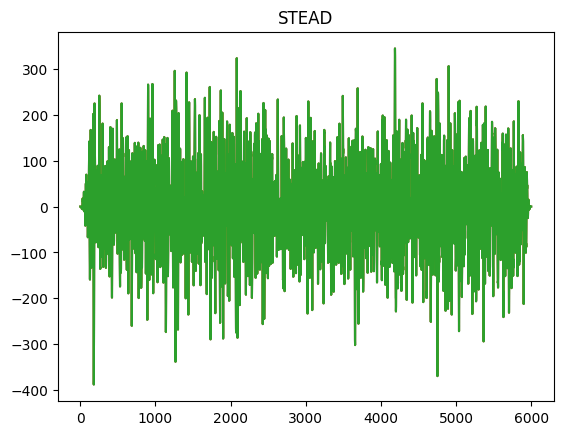

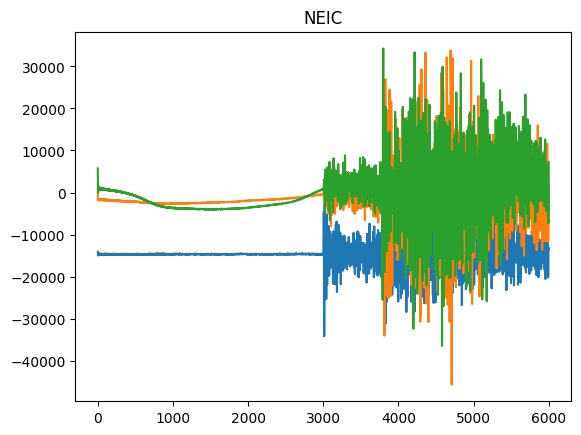

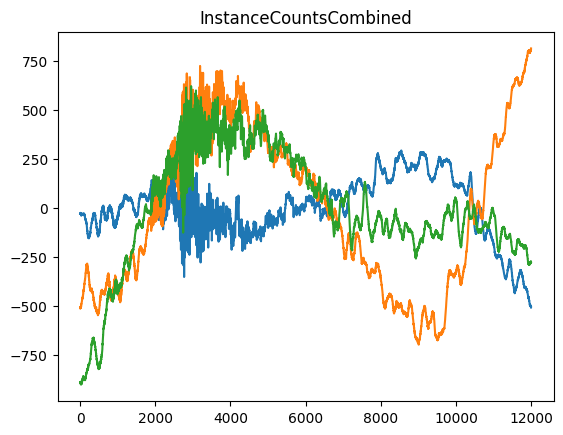

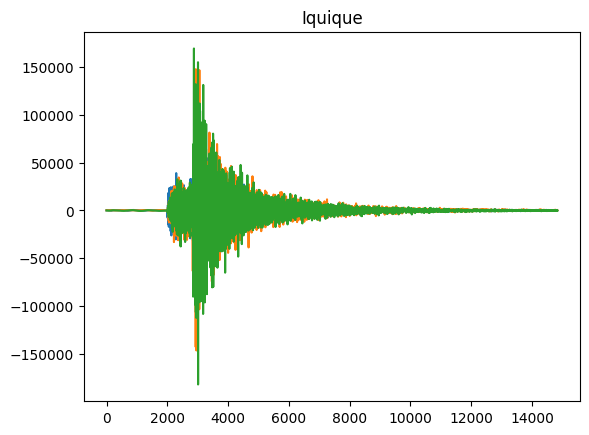

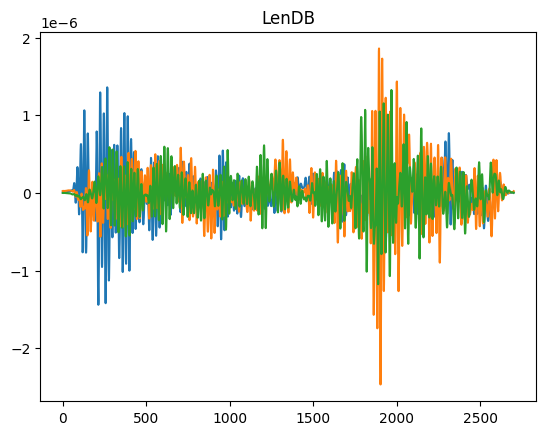

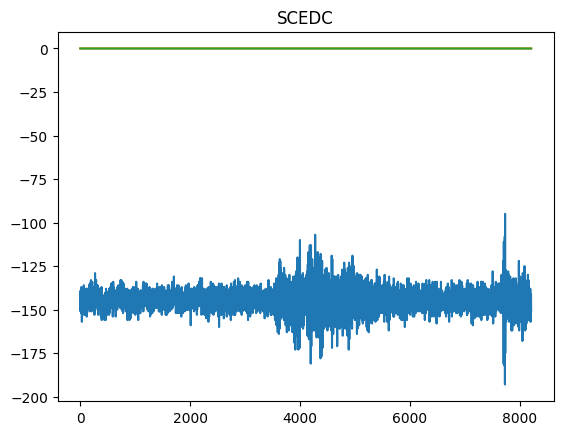

In [29]:
import matplotlib.pyplot as plt


for dataset_name, dataset in dataset_collections.items():
  # print(dataset_name)
  plt.figure()
  plt.plot(dataset.get_waveforms(12).T )
  plt.title(dataset_name)



In [25]:


# model_config_path = '/scicore/home/dokman0000/liu0003/projects/seisLM/seisLM/configs/pretrain/model_config_4xdownsample_scale_logits_quantization.json'
# training_config_path = '/scicore/home/dokman0000/liu0003/projects/seisLM/seisLM/configs/pretrain/training_config.json'


# model_config = Wav2Vec2Config.from_pretrained(
#     model_config_path,
#     attn_implementation="sdpa"
# )

# with open(training_config_path, "r", encoding="utf-8") as f:
#   training_config = json.load(f)
#   training_config = config_dict.ConfigDict(training_config)



In [28]:
dataset_collections['ETHZ'].metadata


,index,source_id,source_origin_time,source_origin_uncertainty_sec,source_latitude_deg,source_latitude_uncertainty_km,source_longitude_deg,source_longitude_uncertainty_km,source_depth_km,source_depth_uncertainty_km,...,trace_Pn_status,trace_Pn_polarity,trace_P_arrival_sample,trace_P_status,trace_P_polarity,trace_Sn_arrival_sample,trace_Sn_status,trace_Sn_polarity,trace_chunk,trace_component_order
0,0,2020zmwrjy,2020-12-27T02:46:42.620452Z,NaN,47.147641,0.620493,6.371343,0.927755,10.965625,2.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
1,1,2020zmwrjy,2020-12-27T02:46:42.620452Z,NaN,47.147641,0.620493,6.371343,0.927755,10.965625,2.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
2,2,2020zmwrjy,2020-12-27T02:46:42.620452Z,NaN,47.147641,0.620493,6.371343,0.927755,10.965625,2.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
3,3,2020zmwrjy,2020-12-27T02:46:42.620452Z,NaN,47.147641,0.620493,6.371343,0.927755,10.965625,2.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
4,4,2020zmwrjy,2020-12-27T02:46:42.620452Z,NaN,47.147641,0.620493,6.371343,0.927755,10.965625,2.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,36738,2013abzm,2013-01-02T02:00:30.983783Z,NaN,46.753628,0.443030,7.092847,0.648661,7.568359,1.029963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
36739,36739,2013abzm,2013-01-02T02:00:30.983783Z,NaN,46.753628,0.443030,7.092847,0.648661,7.568359,1.029963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
36740,36740,2013abzm,2013-01-02T02:00:30.983783Z,NaN,46.753628,0.443030,7.092847,0.648661,7.568359,1.029963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE
36741,36741,2013abzm,2013-01-02T02:00:30.983783Z,NaN,46.753628,0.443030,7.092847,0.648661,7.568359,1.029963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,ZNE


In [26]:
# model = LitMultiDimWav2Vec2(model_config, training_config)


# data_collator = \
#   collator.DataCollatorForWav2Vec2PretrainingConcatChannelsNoPadding(
#       model=model.model,
#       mask_time_prob=training_config.mask_time_prob,
#       mask_time_length=training_config.mask_time_length,
#   )


# training_config.num_workers = 8




# train_loader, dev_loader = dataloaders.prepare_seisbench_dataloaders(
#     model=model,
#     training_fraction=training_config.training_fraction,
#     data_names=training_config.data_name,
#     batch_size=training_config.local_batch_size,
#     num_workers=training_config.num_workers,
#     prefetch_factor=training_config.prefetch_factor,
#     collator=data_collator,
# )

In [32]:
for dataset_name, dataset in dataset_collections.items():
  num_samples = len(dataset)
  print(f'dataset {dataset_name} has {num_samples} samples')

dataset ETHZ has 36743 samples
dataset GEOFON has 275274 samples
dataset STEAD has 1265657 samples
dataset NEIC has 1354789 samples
dataset InstanceCountsCombined has 1291537 samples
dataset Iquique has 13400 samples
dataset LenDB has 1244942 samples
dataset SCEDC has 8035833 samples


In [2]:
import pandas as pd

df = pd.read_csv(
  '/scicore/home/dokman0000/liu0003/.seisbench/datasets/scedc/metadata.csv'
)

df

,trace_start_time,trace_category,trace_name,trace_coda_end_sample,trace_p_arrival_sample,trace_p_status,trace_p_weight,trace_p_travel_sec,trace_s_arrival_sample,trace_s_status,...,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_event_quality,trace_sampling_rate_hz,station_components,trace_component_order,trace_name_original,trace_chunk
0,2000-01-09T17:06:00.679900Z,earthquake local,"bucket3$0,:1,:7482",7482.0,1947.0,NaN,1.0,3.589,2219.0,NaN,...,-117.6847,4.69,0.80,h,0.5,100.0,1,Z,"bucket3$0,:1,:7482",NaN
1,2000-01-09T17:06:00.679900Z,earthquake local,"bucket3$1,:1,:7482",7482.0,2427.0,NaN,0.3,8.390,2963.0,NaN,...,-117.6847,4.69,0.80,h,0.5,100.0,1,Z,"bucket3$1,:1,:7482",NaN
2,2000-01-12T08:21:20.750000Z,earthquake local,"bucket0$0,:1,:8514",8514.0,NaN,NaN,NaN,NaN,2756.0,NaN,...,-116.1795,12.42,1.10,h,1.0,100.0,1,Z,"bucket0$0,:1,:8514",NaN
3,2000-01-12T08:21:20.750000Z,earthquake local,"bucket0$1,:1,:8514",8514.0,2782.0,NaN,0.5,4.202,3091.0,NaN,...,-116.1795,12.42,1.10,h,1.0,100.0,1,Z,"bucket0$1,:1,:8514",NaN
4,2000-01-12T08:21:20.750000Z,earthquake local,"bucket0$2,:1,:8514",8514.0,2966.0,NaN,0.3,6.042,3400.0,NaN,...,-116.1795,12.42,1.10,h,1.0,100.0,1,Z,"bucket0$2,:1,:8514",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035828,2019-12-31T23:28:22.588300Z,earthquake local,"bucket7822$942,:3,:7705",7705.0,3099.0,NaN,0.5,15.128,NaN,NaN,...,-116.0002,1.14,1.45,l,1.0,100.0,1,ZNE,"bucket3680$859,:3,:7705",NaN
8035829,2019-12-31T23:28:22.898300Z,earthquake local,"bucket7822$943,:3,:7764",7764.0,3088.0,NaN,0.5,15.328,NaN,NaN,...,-116.0002,1.14,1.45,l,1.0,100.0,1,ZNE,"bucket3680$860,:3,:7764",NaN
8035830,2019-12-31T23:28:21.033100Z,earthquake local,"bucket7833$290,:3,:8300",8300.0,3275.0,NaN,0.5,15.333,NaN,NaN,...,-116.0002,1.14,1.45,l,1.0,100.0,1,ZNE,"bucket3678$677,:3,:8300",NaN
8035831,2019-12-31T23:28:23.078200Z,earthquake local,"bucket7822$944,:3,:7755",7755.0,3127.0,NaN,0.8,15.898,NaN,NaN,...,-116.0002,1.14,1.45,l,1.0,100.0,1,ZNE,"bucket3680$861,:3,:7755",NaN
